## Setup environment

In [1]:
from simulators.grid_world.grid_world import Maze
from simulators.grid_world.metrics import compute_bad_steps

grid_type = "simple"

feature_type = "one_hot"
dimensions = 124
sigma = None

# feature_type = "simularity"
# dimensions = 100
# sigma = 0.25

n_tries_for_std = 10

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

### Change reward to granular setting

In [2]:
from simulators.grid_world.grid_world import set_granular_reward, set_normilized_reward, divide_reward_by

env = set_granular_reward(env)
env = set_normilized_reward(env)
env = divide_reward_by(env, 10)

## NAC

#### Try with logs and plots

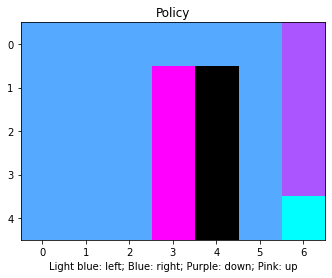

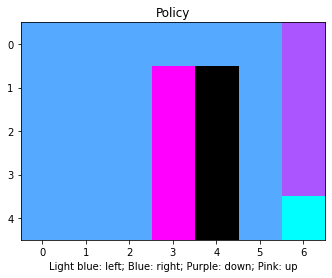

Number of bad policy: 0


In [3]:
from algorithms.NAC.nac import nac

loss_name = "actor_critic"
entropy_weight = 0.1
n_expert_samples = 150
n_expert_iterations = 50
n_rl_iterations = 0
batch_size = 10
update_target_frequency = 10
show_args = {"show_policy":True, "show_value_function": False, "show_statistics": False, "display_frequency": (n_expert_iterations + n_rl_iterations) / 2}


NAC_Q, NAC_policy = nac(
    env,
    loss_name,
    entropy_weight, 
    n_expert_samples, 
    n_expert_iterations, 
    n_rl_iterations, 
    batch_size,
    update_target_frequency,
    **show_args,
)
print("Number of bad policy:", compute_bad_steps(env, NAC_policy))

#### Experiment the real algorithm with Q-learning update

  0%|          | 0/10 [00:00<?, ?it/s]

End expert iterations


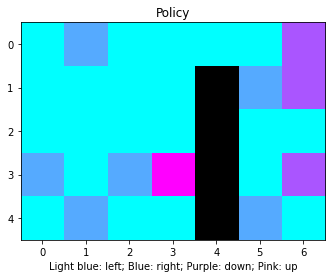

 10%|█         | 1/10 [00:05<00:46,  5.13s/it]

Bad policy: 16
End expert iterations


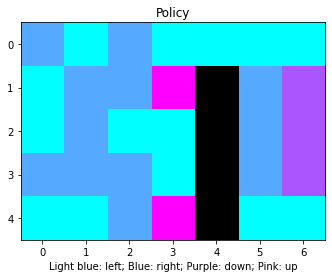

 10%|█         | 1/10 [00:09<01:28,  9.81s/it]


KeyboardInterrupt: 

In [6]:
import time 
import numpy as np

from tqdm import tqdm 
from algorithms.NAC.nac import nac

loss_name = "q_learning"
entropy_weight = 0.1
n_expert_samples = 20
n_expert_iterations = 10
n_rl_iterations = 500
batch_size = 10
update_target_frequency = 20
show_args = {"show_policy":False, "show_value_function": False, "show_statistics": False, "display_frequency": (n_expert_iterations + n_rl_iterations) / 2}

time_algorithm = []
bad_policies = []

for n_try in tqdm(range(n_tries_for_std)):
    time_begin = time.time()
    NAC_Q, NAC_policy = nac(
        env,
        loss_name,
        entropy_weight, 
        n_expert_samples, 
        n_expert_iterations, 
        n_rl_iterations, 
        batch_size,
        update_target_frequency,
        **show_args,
    )
    time_algorithm.append(time.time() - time_begin)
    bad_policy = compute_bad_steps(env, NAC_policy)
    print(f"Bad policy: {bad_policy}")
    bad_policies.append(bad_policy)

print(f"Bad policies: {np.around(np.mean(bad_policies), 3)} +- {np.around(np.std(bad_policies), 3)}")
print(f"Average time {np.around(np.mean(time_algorithm), 3)} +- {np.around(np.std(time_algorithm), 3)}")

#### Experiment the real algorithm with NAC update

In [ ]:
import time 
import numpy as np

from tqdm import tqdm 
from algorithms.NAC.nac import nac

loss_name = "actor_critic"
entropy_weight = 0.1
n_expert_samples = 20
n_expert_iterations = 10
n_rl_iterations = 500
batch_size = 10
update_target_frequency = 20
show_args = {"show_policy":False, "show_value_function": False, "show_statistics": False, "display_frequency": (n_expert_iterations + n_rl_iterations) / 2}

time_algorithm = []
bad_policies = []

for n_try in tqdm(range(n_tries_for_std)):
    time_begin = time.time()
    NAC_Q, NAC_policy = nac(
        env,
        loss_name,
        entropy_weight, 
        n_expert_samples, 
        n_expert_iterations, 
        n_rl_iterations, 
        batch_size,
        update_target_frequency,
        **show_args,
    )
    time_algorithm.append(time.time() - time_begin)
    bad_policy = compute_bad_steps(env, NAC_policy)
    print(f"Bad policy: {bad_policy}")
    bad_policies.append(bad_policy)

print(f"Bad policies: {np.around(np.mean(bad_policies), 3)} +- {np.around(np.std(bad_policies), 3)}")
print(f"Average time {np.around(np.mean(time_algorithm), 3)} +- {np.around(np.std(time_algorithm), 3)}")